# iPython Notebook for Pycon JP 2015 Presentation

In [3]:
%matplotlib inline
import redis
import matplotlib.pyplot as plt

cc_popular = redis.StrictRedis()
print(cc_popular.dbsize())

3561149


In [5]:
for row in cc_popular.keys('17e3f5ff4da952ec9d9f850a571a8d9cf5b1ec69:*:*'):
	s,p,o = row.decode().split(":")
	print(cc_popular.get(p).decode(), cc_popular.get(o).decode())

http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://bibframe.org/vocab/Work
http://bibframe.org/vocab/authorizedAccessPoint jankestevenj1947tinsleyfrederick1951introductiontolinearmodelsandstatisticalinferenceengworktext
http://bibframe.org/vocab/language http://id.loc.gov/vocabulary/languages/eng
http://bibframe.org/vocab/classificationLcc http://id.loc.gov/authorities/classification/QA279
http://bibframe.org/vocab/subject http://catalog.coloradocollege.edu/58052458topic9
http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://bibframe.org/vocab/Text
http://bibframe.org/vocab/workTitle http://catalog.coloradocollege.edu/58052458title5
http://bibframe.org/vocab/contributor http://catalog.coloradocollege.edu/58052458person7
http://bibframe.org/vocab/authorizedAccessPoint Janke, Steven J., 1947- Introduction to linear models and statistical inference / Steven J. Janke, Frederick C. Tinsley.Introduction to linear models and statistical inference
http://bibframe.org/vocab/creator http://

In [37]:
import timeit
redis_setup_stmt = """import redis
cc_popular = redis.StrictRedis()"""
redis_stmt="""cc_popular.keys("17e3f5ff4da952ec9d9f850a571a8d9cf5b1ec69:*:*")"""
redis_trials = []
for count in range(1, 11):
	redis_timer = timeit.timeit(stmt=redis_stmt, setup=redis_setup_stmt, number=count)
	redis_trials.append(redis_timer)


[1.3976355400336615, 1.7649391380764428, 2.172133020068941, 2.5444875704688457, 2.9666830242313154, 3.2388061233286862, 3.7501774181237124, 4.116246406500068, 4.4592888602710445, 4.792335080970588]


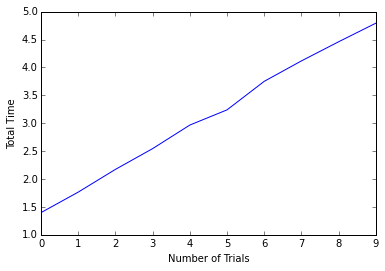

In [38]:
print(redis_trials)
plt.plot(redis_trials)
plt.ylabel('Total Time')
plt.xlabel('Number of Trials')
plt.show()

[1.4115560681179886, 2.843541353151977, 4.225981083255647, 5.70634459369785, 7.027007466575924, 8.499200810706498, 10.486195976799536, 11.411789838113236, 12.694518872840945, 14.152809554236683]


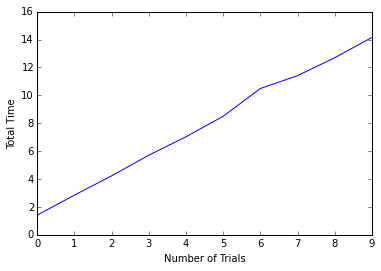

In [27]:
import requests
setup_stmt = """import requests"""
falcon_stmt="""requests.get("http://localhost:18150", data={"s": "http://catalog.coloradocollege.edu/58052458"})"""
falcon_trials = []
for count in range(1,11):
    falcon_timer = timeit.timeit(stmt=falcon_stmt, setup=setup_stmt, number=count)
    falcon_trials.append(falcon_timer)
print(falcon_trials)
plt.plot(falcon_trials)
plt.ylabel('Total Time')
plt.xlabel('Number of Trials')
plt.show()

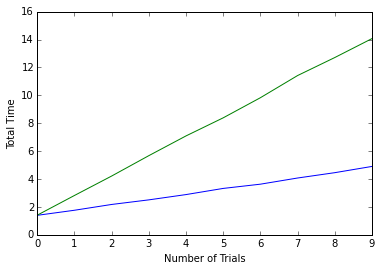

In [13]:
plt.plot(redis_trials)
plt.plot(falcon_trials)
plt.ylabel('Total Time')
plt.xlabel('Number of Trials')
plt.show()

In [1]:
setup_stmt = """import requests"""
asynco_stmt = """requests.get("http://localhost:7000?s=http://catalog.coloradocollege.edu/58052458")"""
asynco_trials = []
for count in range(1,11):
    asynco_timer =  timeit.timeit(stmt=asynco_stmt, setup=setup_stmt, number=count)
    asynco_trials.append(asynco_timer)
print(asynco_trials)
plt.plot(asynco_trials)
plt.ylabel('Total Time')
plt.xlabel('Number of Asynco Trials')
plt.show()

NameError: name 'timeit' is not defined

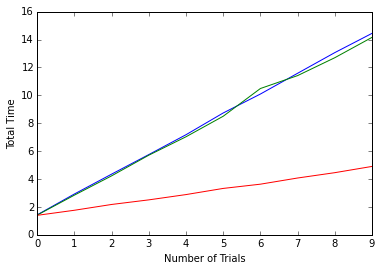

In [29]:
plt.plot(asynco_trials)
plt.plot(falcon_trials)
plt.plot(redis_trials)
plt.ylabel('Total Time')
plt.xlabel('Number of Trials')
plt.show()

In [39]:
redis_timer = timeit.timeit(stmt=redis_stmt, setup=redis_setup_stmt, number=10000)

In [42]:
print(redis_timer/60.0)
print(redis_stmt)

67.4654260765425
cc_popular.keys("17e3f5ff4da952ec9d9f850a571a8d9cf5b1ec69:*:*")


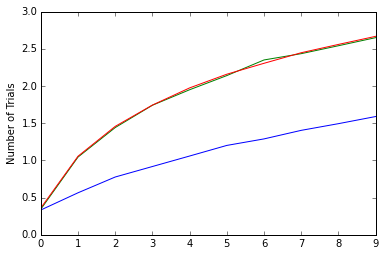

In [36]:
import math
plt.plot([math.log(x) for x in redis_trials])
plt.plot([math.log(x) for x in falcon_trials])
plt.plot([math.log(x) for x in asynco_trials])
plt.ylabel("Log x")
plt.xlabel("Number of Trials")
plt.show()

## Using **SCAN** in cache

In [1]:
import timeit
redis_setup = """import redis
cache_redis = redis.StrictRedis()
def test_redis_scan(count):
    cur = 0
    output = []
    while 1:
        cur, results = cache_redis.scan(cur, match="17e3f5ff4da952ec9d9f850a571a8d9cf5b1ec69:*:*", count=count)
        if len(results) > 0:
            output.extend(results)
        if not cur:
            break
    return output"""
scan_trials = []
for count in [1000, 2500, 5000, 10000, 25000, 50000, 75000, 100000, 250000, 500000]:
    redis_stmt = "test_redis_scan({})".format(count)
    redis_timer = timeit.timeit(stmt=redis_stmt, setup=redis_setup, number=10)
    scan_trials.append((count, redis_timer))

[(1000, 47.81894661298912), (2500, 36.6544218405935), (5000, 33.716968903792846), (10000, 33.84456077704978), (25000, 30.350722658870723), (50000, 30.07344919037044), (75000, 29.58939831707133), (100000, 29.450343264389005), (250000, 29.06849056797421), (500000, 29.790702421457468)]


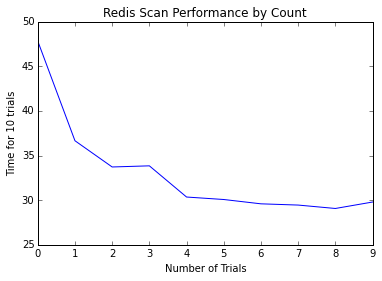

In [4]:
print(scan_trials)
plt.plot([ r[1] for r in scan_trials])
plt.title("Redis Scan Performance by Count")
plt.ylabel("Time for 10 trials")
plt.xlabel("Number of Trials")

plt.show()

In [14]:
redis_stmt = "test_redis_scan(150000)"
redis_timer = timeit.timeit(stmt=redis_stmt, setup=redis_setup, number=10)
print(redis_timer)

37.5432765698647

In [16]:
redis_stmt = "test_redis_scan(175000)"
redis_timer = timeit.timeit(stmt=redis_stmt, setup=redis_setup, number=10)
print(redis_timer)

In [18]:
redis_stmt = "test_redis_scan(200000)"
redis_timer = timeit.timeit(stmt=redis_stmt, setup=redis_setup, number=10)
print(redis_timer)

37.25170480462225


In [19]:
redis_stmt = "test_redis_scan(185000)"
redis_timer = timeit.timeit(stmt=redis_stmt, setup=redis_setup, number=10)
print(redis_timer)

37.55834499011712


In [5]:
redis_trials = []
for i in range(1000, 500000, 10000):
    redis_stmt = "test_redis_scan({})".format(i)
    redis_timer = timeit.timeit(stmt=redis_stmt, setup=redis_setup, number=10)
    print("running {}".format(i))
    redis_trials.append((i, redis_timer))

running 1000
running 11000
running 21000
running 31000
running 41000
running 51000
running 61000
running 71000
running 81000
running 91000
running 101000
running 111000
running 121000
running 131000
running 141000
running 151000
running 161000
running 171000
running 181000
running 191000
running 201000
running 211000
running 221000
running 231000
running 241000
running 251000
running 261000
running 271000
running 281000
running 291000
running 301000
running 311000
running 321000
running 331000
running 341000
running 351000
running 361000
running 371000
running 381000
running 391000
running 401000
running 411000
running 421000
running 431000
running 441000
running 451000
running 461000
running 471000
running 481000
running 491000


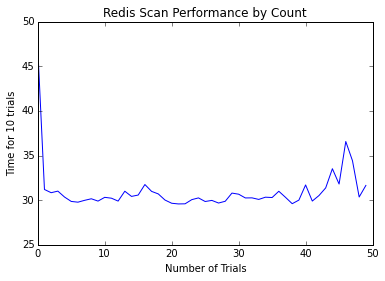

In [6]:
plt.plot([ r[1] for r in redis_trials])
plt.title("Redis Scan Performance by Count")
plt.ylabel("Time for 10 trials")
plt.xlabel("Number of Trials")
plt.show()

In [9]:
print(redis_trials[-5:])
print(min([r[1] for r in redis_trials]))
print(len(redis_trials))

[(451000, 31.804797148820626), (461000, 36.570579499318), (471000, 34.41656837482242), (481000, 30.35253467519601), (491000, 31.650026931268485)]
29.57723306209482
50
